In [1]:
t = "我们是共产主义的接班人"
d = ("我们", "是", "共产主义", "的", "接班", "人", "你", "我", "社会", "主义")

In [2]:
def get_max_len(d):
    max_len_word = 0
    for key in d:
        if len(key) > max_len_word:
            max_len_word = len(key)
    return max_len_word


get_max_len(d)

4

In [3]:
def mm(t, d):
    words = []  # 用于存放分词结果
    while len(t) > 0:  # 句子长度大于 0，则开始循环
        word_len = get_max_len(d)
        for i in range(0, word_len):
            word = t[0:word_len]  # 取出文本前 word_len 个字符
            if word not in d:  # 判断 word 是否在词典中
                word_len -= 1  # 不在则以 word_len - 1
                word = []  # 清空 word
            else:  # 如果 word 在词典当中
                t = t[word_len:]  # 更新文本起始位置
                words.append(word)
                word = []
    return words

In [4]:
mm(t, d)  # 运行测试

['我们', '是', '共产主义', '的', '接班', '人']

In [ ]:
# 结巴中文分词

In [11]:
import jieba

seg = "深度学习是机器学习的一个子集"
seg_list = jieba.cut(seg)
seg_list

<generator object Tokenizer.cut at 0x000002442EA87CC0>

In [6]:
# %#%time
", ".join(seg_list)

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\91658\AppData\Local\Temp\jieba.cache
Loading model cost 1.291 seconds.
Prefix dict has been built successfully.


'深度, 学习, 是, 机器, 学习, 的, 一个, 子集'

In [7]:
# %#%time
", ".join(jieba.cut(seg, cut_all=True))

'深度, 学习, 是, 机器, 学习, 的, 一个, 个子, 子集'

In [8]:
# %#%time
", ".join(jieba.cut_for_search(seg))

'深度, 学习, 是, 机器, 学习, 的, 一个, 子集'

In [9]:
jieba.add_word("机器学习")  # 添加用户词汇
jieba.add_word("人工智能")
", ".join(jieba.cut(seg))

'深度, 学习, 是, 机器学习, 的, 一个, 子集'

In [ ]:
# 英文文本分词

In [10]:
"i have a pen".split()  # split 方法默认将字符串按空格拆分

['i', 'have', 'a', 'pen']

In [11]:
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
text = """
[English] is a West Germanic language that was first spoken in early 
medieval England and eventually became a global lingua franca.
It is named after the <Angles>, one of the Germanic tribes that 
migrated to the area of Great Britain that later took their name, 
as England.
"""

words = text.split()
table = str.maketrans("", "", string.punctuation)
stripped = [w.translate(table) for w in words]
print(stripped)

['English', 'is', 'a', 'West', 'Germanic', 'language', 'that', 'was', 'first', 'spoken', 'in', 'early', 'medieval', 'England', 'and', 'eventually', 'became', 'a', 'global', 'lingua', 'franca', 'It', 'is', 'named', 'after', 'the', 'Angles', 'one', 'of', 'the', 'Germanic', 'tribes', 'that', 'migrated', 'to', 'the', 'area', 'of', 'Great', 'Britain', 'that', 'later', 'took', 'their', 'name', 'as', 'England']


In [ ]:
# 文本特征提取

In [ ]:
# 统计原句子中某个单词出现的次数，这样，无论句子的长度如何，均可用等长度的词袋向量进行表示

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    "The elephant sneeze at the sight of potato.",
    "Bat can see via echolocation. See the bat sight sneeze!",
    "Wonder, she open the door to the studio.",
]

vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names_out())  # 打印出词袋
vectors.toarray()  # 打印词向量

['at' 'bat' 'can' 'door' 'echolocation' 'elephant' 'of' 'open' 'potato'
 'see' 'she' 'sight' 'sneeze' 'studio' 'the' 'to' 'via' 'wonder']


array([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 0],
       [0, 2, 1, 0, 1, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 1]],
      dtype=int64)

In [14]:
# 不以单词实际出现的次数表示，而是采取类似独热编码的方式。单词出现即置为 1，未出现即为 0

# 还是向量表，不算次数了，按是否出现标记

In [15]:
from sklearn.preprocessing import Binarizer

freq = CountVectorizer()
corpus_ = freq.fit_transform(corpus)

onehot = Binarizer()
onehot.fit_transform(corpus_.toarray())

array([[1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1]],
      dtype=int64)

In [ ]:
# TF-IDF 

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(corpus)
tfidf.toarray()

array([[0.39066946, 0.        , 0.        , 0.        , 0.        ,
        0.39066946, 0.39066946, 0.        , 0.39066946, 0.        ,
        0.        , 0.29711419, 0.29711419, 0.        , 0.46147135,
        0.        , 0.        , 0.        ],
       [0.        , 0.56555816, 0.28277908, 0.        , 0.28277908,
        0.        , 0.        , 0.        , 0.        , 0.56555816,
        0.        , 0.21506078, 0.21506078, 0.        , 0.16701388,
        0.        , 0.28277908, 0.        ],
       [0.        , 0.        , 0.        , 0.36772387, 0.        ,
        0.        , 0.        , 0.36772387, 0.        , 0.        ,
        0.36772387, 0.        , 0.        , 0.36772387, 0.43436728,
        0.36772387, 0.        , 0.36772387]])

In [ ]:
# Word2Vec 模型

In [ ]:
# gensim.modelsWord2Vec()

# - vector_size: 词嵌入的维数，表示每个单词嵌入后的向量长度。
# - window: 目标字与目标字周围的字之间的最大距离。
# - min_count: 训练模型时要考虑的最小字数，出现小于此计数的单词将被忽略。
# - sg: 训练算法，CBOW(0)或 Skip-Gram(1)。

In [17]:
from gensim.models import Word2Vec

# 分词之后的示例文本
sentences = [
    ["the", "elephant", "sneeze", "at", "the", "sight", "of", "potato"],
    [
        "bat",
        "can",
        "see",
        "via",
        "echolocation",
        "see",
        "the",
        "bat",
        "sight",
        "sneeze",
    ],
    ["wonder", "she", "open", "the", "door", "to", "the", "studio"],
]

# 训练模型
model = Word2Vec(sentences, vector_size=20, min_count=1)
# 输出该语料库独立不重复词
print(list(model.wv.key_to_index))
# 输出 elephant 单词词嵌入后的向量

# 已经将词转化为向量
model.wv.get_vector("elephant")

['the', 'bat', 'sneeze', 'sight', 'see', 'elephant', 'at', 'of', 'potato', 'studio', 'to', 'via', 'echolocation', 'wonder', 'she', 'open', 'door', 'can']


array([-0.04309844,  0.01832869,  0.02594942,  0.02870969,  0.03733459,
       -0.03083838,  0.00552807,  0.03023641, -0.01420025, -0.03086761,
       -0.00205112, -0.04184474, -0.02800006,  0.03552269,  0.0167627 ,
        0.03612835,  0.03400124,  0.03765371, -0.01894577, -0.00280903],
      dtype=float32)

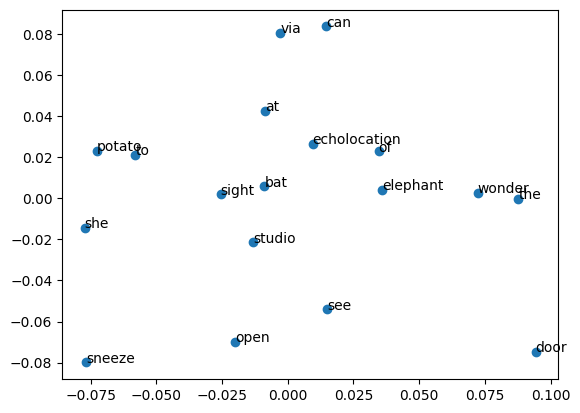

In [18]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

%matplotlib inline

# PCA 降维
X = model.wv.vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# 绘制散点图，并将单词标记出来
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.key_to_index)
for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [19]:
from gensim.models import KeyedVectors

filename = '../../data/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

FileNotFoundError: [Errno 2] No such file or directory: 'GoogleNews-vectors-negative300.bin'

In [3]:
import pandas as pd

df = pd.read_csv("../../data/wsdm_mini.csv")
df.head()

,title1_zh,title2_zh,label
0,千叶湖八岁孩子不想去学英语，跳楼了,「辟谣」千叶湖八岁孩子跳楼了为谣言信息,disagreed
1,喝酸奶真的能补充益生菌吗？,喝酸奶来补充益生菌，靠谱么？,agreed
2,刚刚马云终于出手了！房价要跌，扬言房地产中介都要失业了,最新消息马云终于出手了！扬言房地产中介都要失业！6,agreed
3,直击“冯乡长”李正春追悼会：赵本山全程操办，赵四刘能现场祭奠,昆明会议直击“活摘”谣言,unrelated
4,李雨桐爆薛之谦离婚内幕，说到底就是网红之间的恩怨情仇嘛,薛之谦前女友李雨桐再次发微博爆料，薛之谦工作室发声明辟谣,disagreed


In [4]:
# 合并文本，然后对文本进行分词处理 

df['title_zh'] = df[['title1_zh', 'title2_zh']].apply(lambda x: ''.join(x), axis=1)  # 合并文本数据列
df_merge = df.drop(df.columns[[0, 1]], axis=1)  # 删除原文本列
df_merge.head()

,label,title_zh
0,disagreed,千叶湖八岁孩子不想去学英语，跳楼了「辟谣」千叶湖八岁孩子跳楼了为谣言信息
1,agreed,喝酸奶真的能补充益生菌吗？喝酸奶来补充益生菌，靠谱么？
2,agreed,刚刚马云终于出手了！房价要跌，扬言房地产中介都要失业了最新消息马云终于出手了！扬言房地产中介...
3,unrelated,直击“冯乡长”李正春追悼会：赵本山全程操办，赵四刘能现场祭奠昆明会议直击“活摘”谣言
4,disagreed,李雨桐爆薛之谦离婚内幕，说到底就是网红之间的恩怨情仇嘛薛之谦前女友李雨桐再次发微博爆料，薛之...


In [9]:
def load_stopwords(file_path):
    with open(file_path, 'r', encoding='UTF-8') as f:
        stopwords = [line.strip('\n') for line in f.readlines()]
    return stopwords
stopwords = load_stopwords('../../data/stopwords.txt')
stopwords

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '.',
 '..',
 '...',
 '......',
 '...................',
 './',
 '.一',
 '.数',
 '.日',
 '/',
 '//',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 '://',
 '::',
 ';',
 '<',
 '=',
 '>',
 '>>',
 '?',
 '@',
 'A',
 'Lex',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'exp',
 'sub',
 'sup',
 '|',
 '}',
 '~',
 '~~~~',
 '·',
 '×',
 '×××',
 'Δ',
 'Ψ',
 'γ',
 'μ',
 'φ',
 'φ．',
 'В',
 '—',
 '——',
 '———',
 '‘',
 '’',
 '’‘',
 '“',
 '”',
 '”，',
 '…',
 '……',
 '…………………………………………………③',
 '′∈',
 '′｜',
 '℃',
 'Ⅲ',
 '↑',
 '→',
 '∈［',
 '∪φ∈',
 '≈',
 '①',
 '②',
 '②ｃ',
 '③',
 '③］',
 '④',
 '⑤',
 '⑥',
 '⑦',
 '⑧',
 '⑨',
 '⑩',
 '──',
 '■',
 '▲',
 '\u3000',
 '、',
 '。',
 '〈',
 '〉',
 '《',
 '》',
 '》），',
 '」',
 '『',
 '』',
 '【',
 '】',
 '〔',
 '〕',
 '〕〔',
 '㈧',
 '一',
 '一.',
 '一一',
 '一下',
 '一个',
 '一些',
 '一何',
 '一切',
 '一则',
 '一则通过',
 '一天',
 '一定',
 '一方面',
 '一旦',
 '一时',
 '一来',
 '一样',
 '一次',
 '一片',
 '一番',
 '一直',
 '一致',
 '一般',
 '一起',


In [12]:
from tqdm.notebook import tqdm

# 利用 jieba 进行分词，并且取出停用词

corpus = []
for line in tqdm(df['title_zh']):
    words = []
    seg_list = list(jieba.cut(line))  # 分词
    for word in seg_list:
        if word in stopwords:  # 删除停用词
            continue
        words.append(word)
    corpus.append(words)

  0%|          | 0/15000 [00:00<?, ?it/s]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\91658\AppData\Local\Temp\jieba.cache
Loading model cost 0.452 seconds.
Prefix dict has been built successfully.


In [13]:
import numpy as np
from gensim.models import Word2Vec

model = Word2Vec(corpus)  # 词嵌入，默认 size=100

# 整个句子所有单词向量的和，得到空间向量上这个句子的向量
def sum_vec(text):
    vec = np.zeros(100).reshape((1, 100))  # 初始化一个和 Word2Vec 嵌入等长度的 0 向量
    for word in text:
        # 得到句子中每个词的词向量并累加在一起
        if word in list(model.wv.index_to_key):
            vec += model.wv.get_vector(word).reshape((1, 100))
        else:
            pass
    return vec

# 将词向量保存为 Ndarray
X = np.concatenate([sum_vec(z) for z in tqdm(corpus)])
X.shape

  0%|          | 0/15000 [00:00<?, ?it/s]

(15000, 100)

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# 数据集拆分
X_train, X_test, y_train, y_test = train_test_split(X, df.label, test_size=0.2)

# 随机森林算法进行分类
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6693333333333333